In [102]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [159]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

### Import Dataset

In [104]:
df = pd.read_csv("auto.csv")
df.sample(5)

,mpg,displ,hp,weight,accel,origin,size
304,34.2,105.0,70,2200,13.2,US,10.0
16,36.0,79.0,58,1825,18.6,Europe,10.0
254,19.2,305.0,145,3425,13.2,US,20.0
356,18.0,70.0,90,2124,13.5,Asia,7.5
212,33.7,107.0,75,2210,14.4,Asia,10.0


### Data Information

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [106]:
df.describe()

,mpg,displ,hp,weight,accel,size
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,13.679847
std,7.805007,104.644004,38.491160,849.402560,2.758864,4.264458
min,9.000000,68.000000,46.000000,1613.000000,8.000000,7.500000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,10.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,10.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,20.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,20.000000


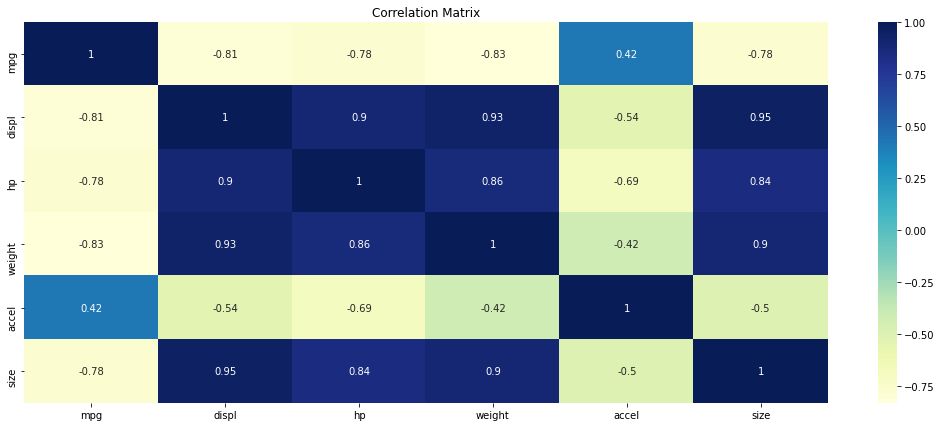

In [107]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, cmap = "YlGnBu", annot = True)
plt.title("Correlation Matrix")
plt.show()

### Data Analytics

**Statistics of mpg by origin**

In [108]:
mo = df.groupby("origin")["mpg"].agg(["min", "mean", "max"]).round(2)
mo = mo.reset_index()
mo.columns = ["Origin", "Min Mpg", "Avg Mpg", "Max Mpg"]
mo

,Origin,Min Mpg,Avg Mpg,Max Mpg
0,Asia,18.0,30.45,46.6
1,Europe,16.2,27.60,44.3
2,US,9.0,20.03,39.0


**Distribution of mpg by origin**

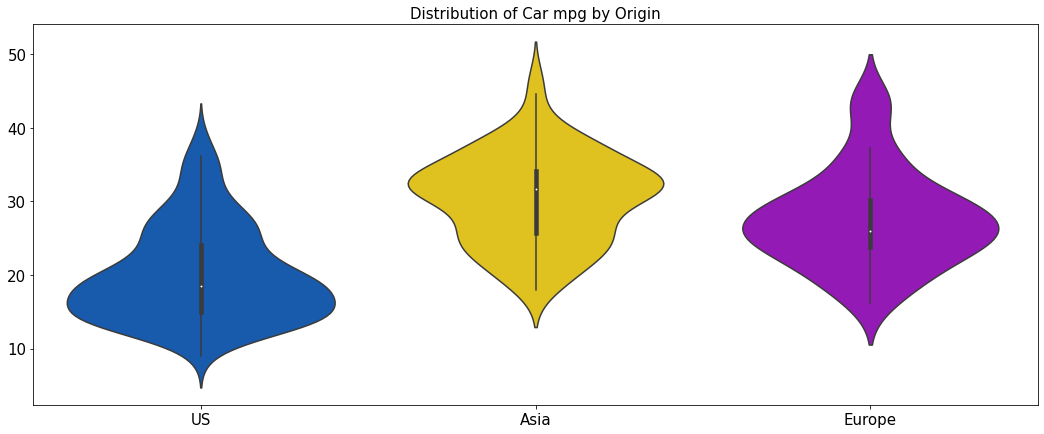

In [109]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "origin", y = "mpg", data = df, palette = "prism")
plt.title("Distribution of Car mpg by Origin", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Statistics of displ by origin**

In [110]:
do = df.groupby("origin")["displ"].agg(["min", "mean", "max"]).round(2)
do = do.reset_index()
do.columns = ["Origin", "Min displ", "Avg displ", "Max displ"]
do

,Origin,Min displ,Avg displ,Max displ
0,Asia,70.0,102.71,168.0
1,Europe,68.0,109.63,183.0
2,US,85.0,247.51,455.0


**Distribution of displ by origin**

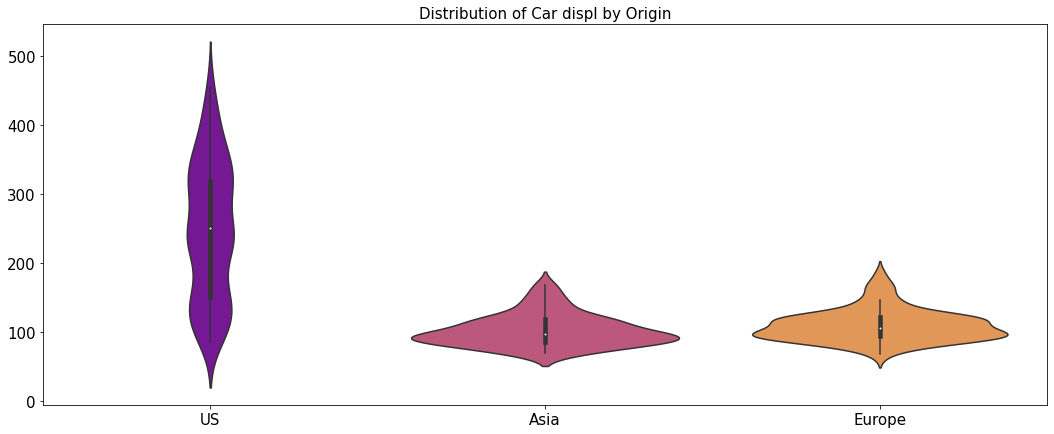

In [111]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "origin", y = "displ", data = df, palette = "plasma")
plt.title("Distribution of Car displ by Origin", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Statistics of car hp by origin**

In [112]:
ho = df.groupby("origin")["hp"].agg(["min", "mean", "max"]).round(2)
ho = ho.reset_index()
ho.columns = ["Origin", "Min hp", "Avg hp", "Max hp"]
ho

,Origin,Min hp,Avg hp,Max hp
0,Asia,52,79.84,132
1,Europe,46,80.56,133
2,US,52,119.05,230


**Distribution of car hp by origin**

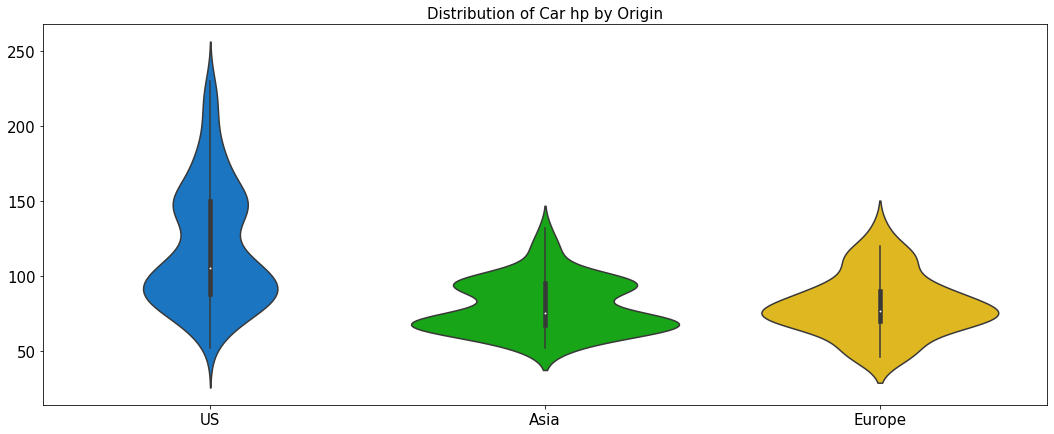

In [113]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "origin", y = "hp", data = df, palette = "nipy_spectral")
plt.title("Distribution of Car hp by Origin", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Stat of car weight by origin**

In [114]:
co = df.groupby("origin")["weight"].agg(["min", "mean", "max"]).round(2)
co = co.reset_index()
co.columns = ["Origin", "Min weight", "Avg weight", "Max weight"]
co

,Origin,Min weight,Avg weight,Max weight
0,Asia,1613,2221.23,2930
1,Europe,1825,2433.47,3820
2,US,1800,3372.49,5140


**Distribution of car weight by origin**

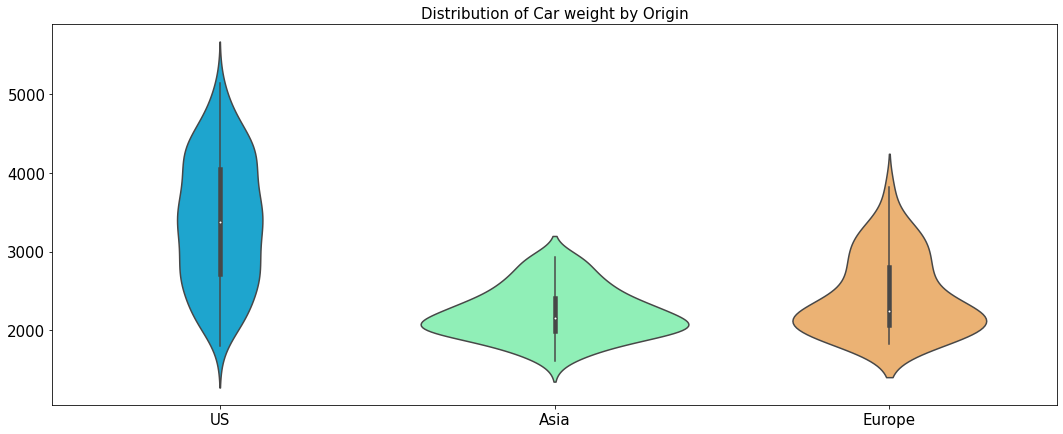

In [115]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "origin", y = "weight", data = df, palette = "rainbow")
plt.title("Distribution of Car weight by Origin", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Statistics of car accel by origin**

In [116]:
co = df.groupby("origin")["accel"].agg(["min", "mean", "max"]).round(2)
co = co.reset_index()
co.columns = ["Origin", "Min accel", "Avg accel", "Max accel"]
co

,Origin,Min accel,Avg accel,Max accel
0,Asia,11.4,16.17,21.0
1,Europe,12.2,16.79,24.8
2,US,8.0,14.99,22.2


**Distribution of car accel by origin**

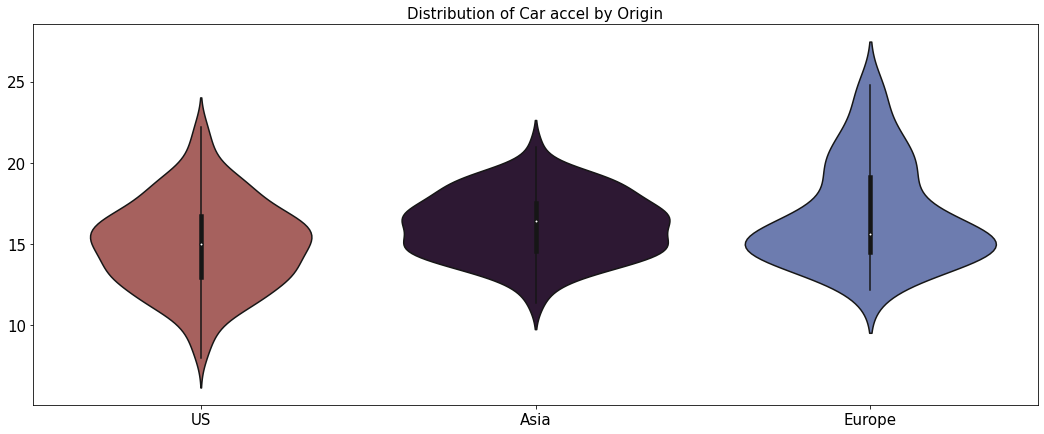

In [117]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "origin", y = "accel", data = df, palette = "twilight_r")
plt.title("Distribution of Car accel by Origin", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Statistics of car size by origin**

In [118]:
co = df.groupby("origin")["size"].agg(["min", "mean", "max"]).round(2)
co = co.reset_index()
co.columns = ["Origin", "Min size", "Avg size", "Max size"]
co

,Origin,Min size,Avg size,Max size
0,Asia,7.5,10.25,15.0
1,Europe,10.0,10.40,15.0
2,US,10.0,15.69,20.0


**Distribution of car size by origin**

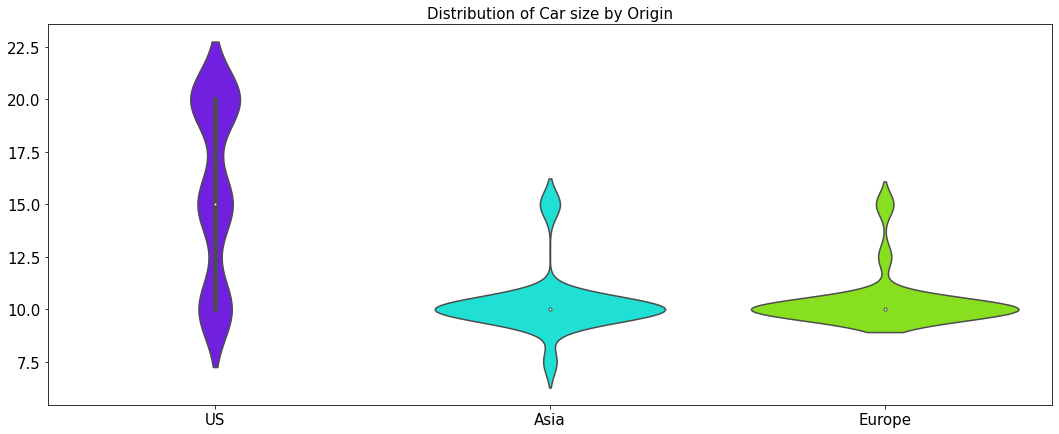

In [119]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "origin", y = "size", data = df, palette = "hsv_r")
plt.title("Distribution of Car size by Origin", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Preprocessing data

In [120]:
df_origin = pd.get_dummies(df)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


### K Neighbors Classification on Europe Cars

In [121]:
X = df_origin[["mpg", "displ", "hp", "weight", "accel", "size"]]
y = df_origin["origin_Europe"]

In [122]:
# Split data in train set and test set
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

### Find Best K Value

In [123]:
k = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    k.append(accuracy)
k

[0.8220338983050848,
 0.8135593220338984,
 0.8305084745762712,
 0.7966101694915254,
 0.8135593220338984,
 0.7796610169491526,
 0.7627118644067796,
 0.7627118644067796,
 0.7627118644067796]

In [124]:
best_k = k.index(max(k))
print("Best K Index =", str(best_k))
print("Best K Accuracy =", str(k[best_k]))

Best K Index = 2
Best K Accuracy = 0.8305084745762712


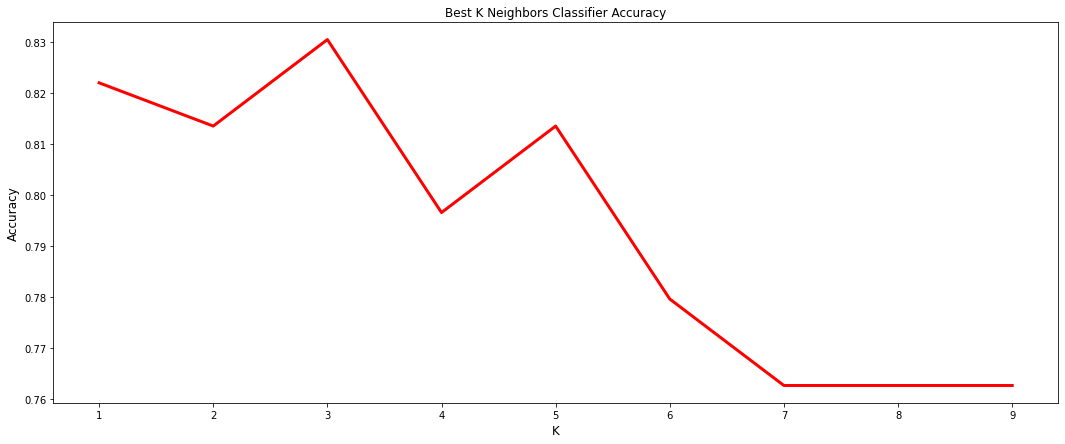

In [125]:
k_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.title("Best K Neighbors Classifier Accuracy", size = 12)
plt.plot(k_list, k, color = "red", linewidth = 3)
plt.xlabel("K", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.show()

**Use K = 3**

In [126]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
yhat = knn.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": yhat})[0:20]

,Actual,Predicted
78,0,0
274,0,0
246,0,0
55,0,1
387,0,0
203,0,0
42,0,0
233,0,0
150,0,0
116,0,0


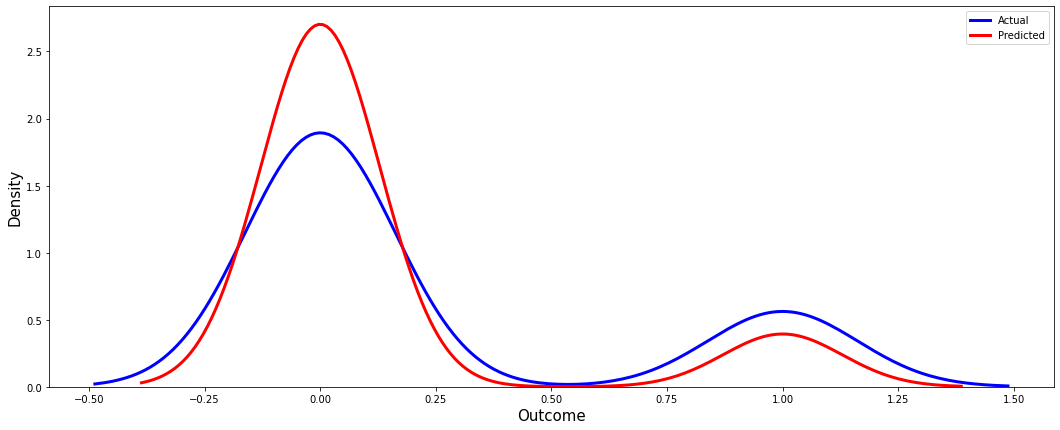

In [127]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df_origin, x = y_test, label = "Actual", linewidth = 3, color = "blue")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [128]:
print(confusion_matrix(y_test, yhat))

[[87  4]
 [16 11]]


In [129]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        91
           1       0.73      0.41      0.52        27

    accuracy                           0.83       118
   macro avg       0.79      0.68      0.71       118
weighted avg       0.82      0.83      0.81       118



### Logistic Regression on US Cars

In [130]:
X = df_origin[["mpg", "displ", "hp", "weight", "accel", "size"]]
y = df_origin["origin_US"]

In [131]:
# Logistic Regressio Object
lr = LogisticRegression()

# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.4,
                                                    random_state = 42)
# Fit model into training set
lr.fit(x_train, y_train)

# Prediction
yhat = lr.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": yhat})[0:20]

,Actual,Predicted
78,1,1
274,1,1
246,1,1
55,1,0
387,1,1
203,0,0
42,1,1
233,1,1
150,1,1
116,0,0


In [132]:
score = accuracy_score(y_test, yhat)
print("Accuracy Score of Model =", score) 

Accuracy Score of Model = 0.8598726114649682


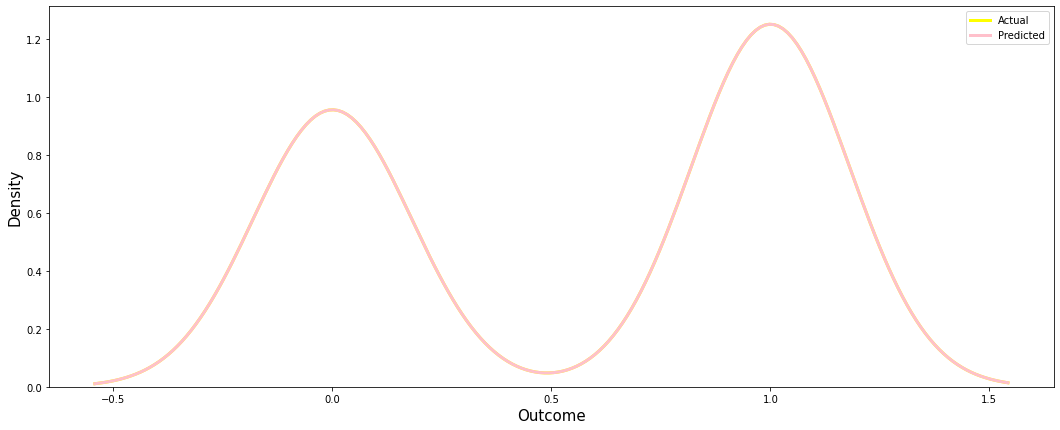

In [133]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df_origin, x = y_test, label = "Actual", linewidth = 3, color = "yellow")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "pink")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [134]:
print(confusion_matrix(y_test, yhat))

[[57 11]
 [11 78]]


In [135]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        68
           1       0.88      0.88      0.88        89

    accuracy                           0.86       157
   macro avg       0.86      0.86      0.86       157
weighted avg       0.86      0.86      0.86       157



### Grid Search Cross Validation (Logistic Regression) on Asian Cars

In [136]:
X = df_origin[["mpg", "displ", "hp", "weight", "accel", "size"]]
y = df_origin["origin_Asia"]

In [145]:
# Hyperparameters
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ["l1", "l2"]}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.4,
                                                    random_state = 42)

# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit the model
logreg_cv.fit(x_train, y_train)

# Tuned Logistic Regression Parameters
print("Tuned Logistic Regression Parameters =", logreg_cv.best_params_, "\n")
print("Best Score is ", logreg_cv.best_score_)

Tuned Logistic Regression Parameters = {'C': 8.483428982440725e-05, 'penalty': 'l2'} 

Best Score is  0.8297872340425532


In [146]:
y_pred = logreg_cv.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[0:20]

,Actual,Predicted
78,0,0
274,0,0
246,0,0
55,0,0
387,0,0
203,1,0
42,0,0
233,0,0
150,0,0
116,1,1


In [148]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score of Model is =", score)

Accuracy Score of Model is = 0.802547770700637


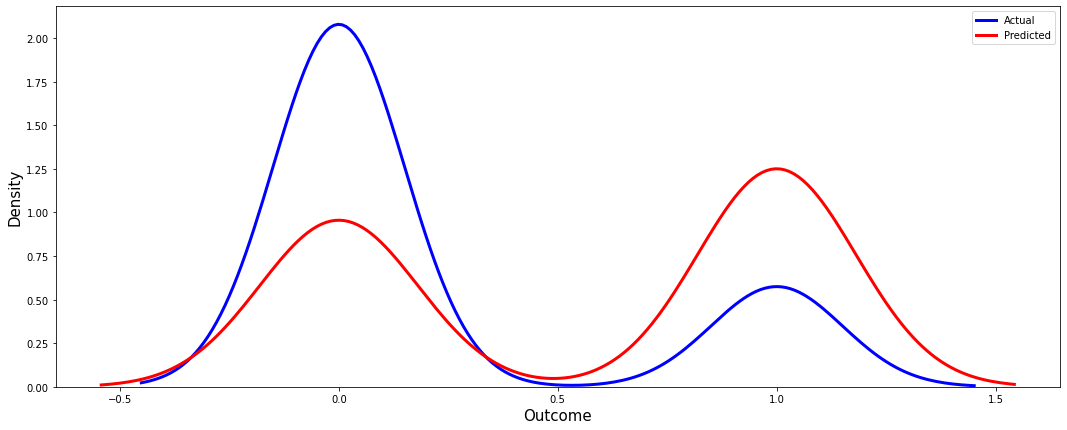

In [150]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df_origin, x = y_test, label = "Actual", linewidth = 3, color = "blue")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [152]:
print(confusion_matrix(y_test, yhat))

[[36 87]
 [32  2]]


In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       123
           1       0.55      0.50      0.52        34

    accuracy                           0.80       157
   macro avg       0.71      0.69      0.70       157
weighted avg       0.80      0.80      0.80       157



### Hyperparameter tuning(Decision Tree Classification) with RandomizedSearchCV on Asian Cars

In [153]:
X = df_origin[["mpg", "displ", "hp", "weight", "accel", "size"]]
y = df_origin["origin_Asia"]

In [160]:
# Setup the parameters
param_dist = {"max_depth": range(1, 10),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 42)


# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

# Fit it to the data
tree_cv.fit(x_train, y_train)

# Tuned Parameters
print("Tuned Decision Tree Parameters =", tree_cv.best_params_, "\n")

# Best Score
print("Best Score is =", tree_cv.best_score_)

Tuned Decision Tree Parameters = {'criterion': 'gini', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 1} 

Best Score is = 0.8688215488215489


In [161]:
# Actual Outcome vs Predicted Outcome
yhat = tree_cv.predict(x_test)
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": yhat})[0:20]

,Actual Outcome,Predicted Outcome
78,0,0
274,0,0
246,0,0
55,0,0
387,0,0
203,1,0
42,0,0
233,0,0
150,0,0
116,1,1


In [162]:
print(confusion_matrix(y_test, yhat))

[[81 10]
 [ 8 19]]


In [163]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        91
           1       0.66      0.70      0.68        27

    accuracy                           0.85       118
   macro avg       0.78      0.80      0.79       118
weighted avg       0.85      0.85      0.85       118



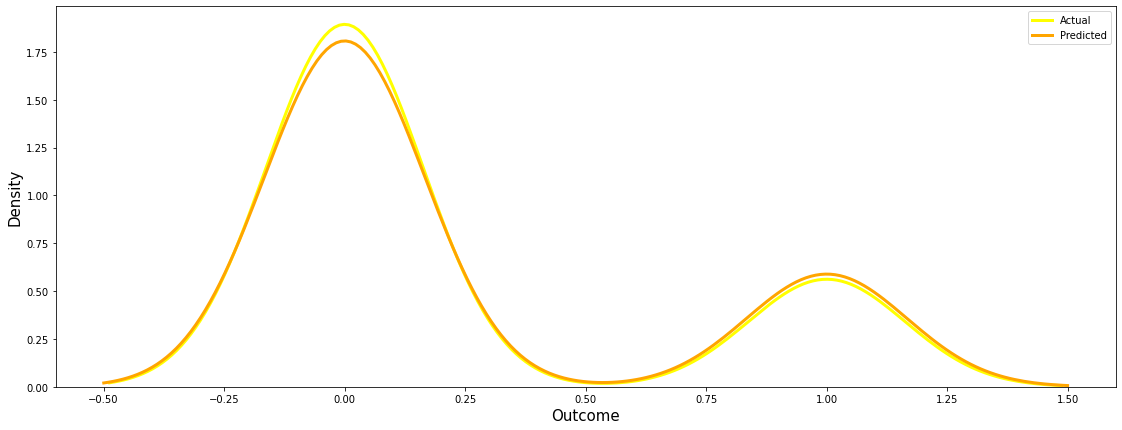

In [164]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3, color = "yellow")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "orange")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()